テストデータ作成

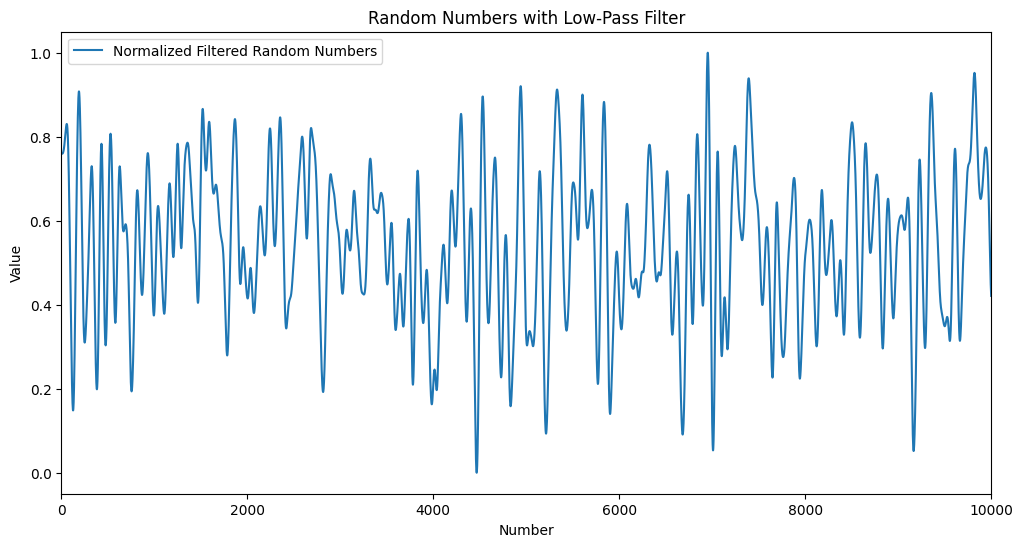

In [ ]:
# 口の開き具合の動作テストデータ

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, lfilter_zi
import pandas as pd

# 乱数生成を固定値にする
np.random.seed(0) # seed値を指定することで、何度実行しても同じ乱数が生成される
ran_num = 10000
ran = np.random.rand(ran_num) # 0~1のfloot型で乱数生成

# ローパスフィルタ
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a) * data[0]  # 初期条件をデータに合わせて設定
    y, _ = lfilter(b, a, data, zi=zi)  # 初期条件を考慮したフィルタリング
    return y

# サンプリング周波数とカットオフ周波数
fs = 1000  # サンプリング周波数（適宜変更）
cutoff = 10  # カットオフ周波数（適宜変更）

# フィルタリング
filtered_ran = butter_lowpass_filter(ran, cutoff, fs)

# 標準化
min_val = np.min(filtered_ran)
max_val = np.max(filtered_ran)
normalized_filtered_ran = (filtered_ran - min_val) / (max_val - min_val)

# CSVファイルとして保存
df = pd.DataFrame(normalized_filtered_ran, columns=['normalized_filtered_ran'])
df.to_csv('normalized_filtered_ran.csv', index=False)


# 結果の表示（オプション）
plt.figure(figsize=(12, 6))
plt.plot(normalized_filtered_ran, label='Normalized Filtered Random Numbers')
plt.xlim(0,10000)
plt.xlabel("Number")
plt.ylabel("Value")
plt.title("Random Numbers with Low-Pass Filter")
plt.legend()
plt.show()

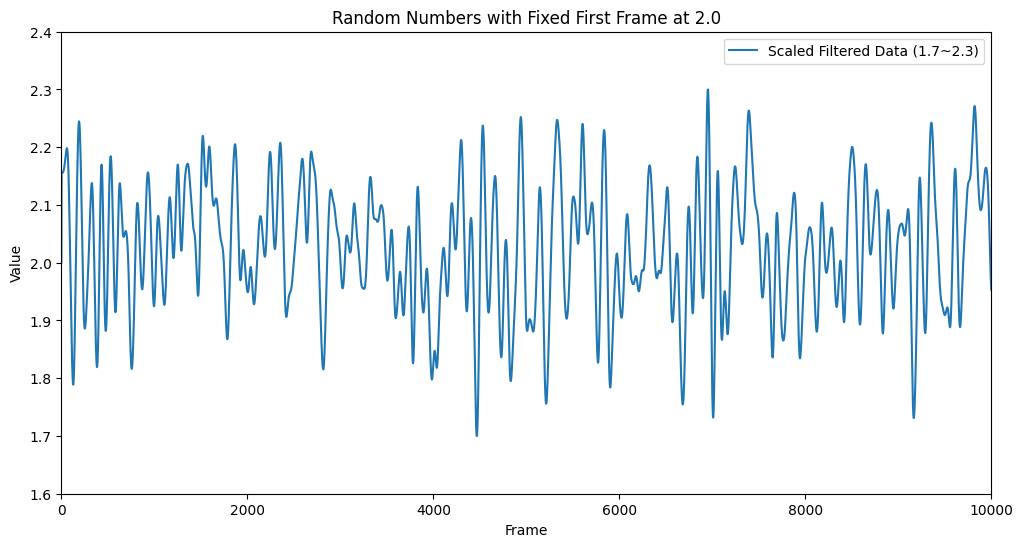

In [ ]:
# コントローラの高さの動作テストデータ
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, lfilter_zi
import pandas as pd

# 乱数生成を固定値にする
np.random.seed(0)  # 再現性のため乱数シードを固定
ran_num = 10000    # データポイント数

# データ生成 (0~1の乱数)
data = np.random.rand(ran_num)  # 0~1の乱数を生成

# ローパスフィルタの設定
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a) * data[0]  # 初期条件をデータに合わせて設定
    y, _ = lfilter(b, a, data, zi=zi)  # 初期条件を考慮したフィルタリング
    return y

# サンプリング周波数とカットオフ周波数
fs = 1000  # サンプリング周波数
cutoff = 10  # カットオフ周波数

# フィルタリング
filtered_data = butter_lowpass_filter(data, cutoff, fs)

# スケール調整 (1.7~2.3)
min_val = np.min(filtered_data)
max_val = np.max(filtered_data)
scaled_filtered_data = (filtered_data - min_val) / (max_val - min_val) * (2.3 - 1.7) + 1.7

# 1フレーム目を2.0に固定
scaled_filtered_data[0] = 2.0

# CSVファイルとして保存
df = pd.DataFrame(scaled_filtered_data, columns=['scaled_filtered_data'])
df.to_csv('A_ControllerHeight_ran.csv', index=False)

# 結果の表示（オプション）
plt.figure(figsize=(12, 6))
plt.plot(scaled_filtered_data, label='Scaled Filtered Data (1.7~2.3)')
plt.xlim(0, 10000)
plt.ylim(1.6, 2.4)
plt.xlabel("Frame")
plt.ylabel("Value")
plt.title("Random Numbers with Fixed First Frame at 2.0")
plt.legend()
plt.show()




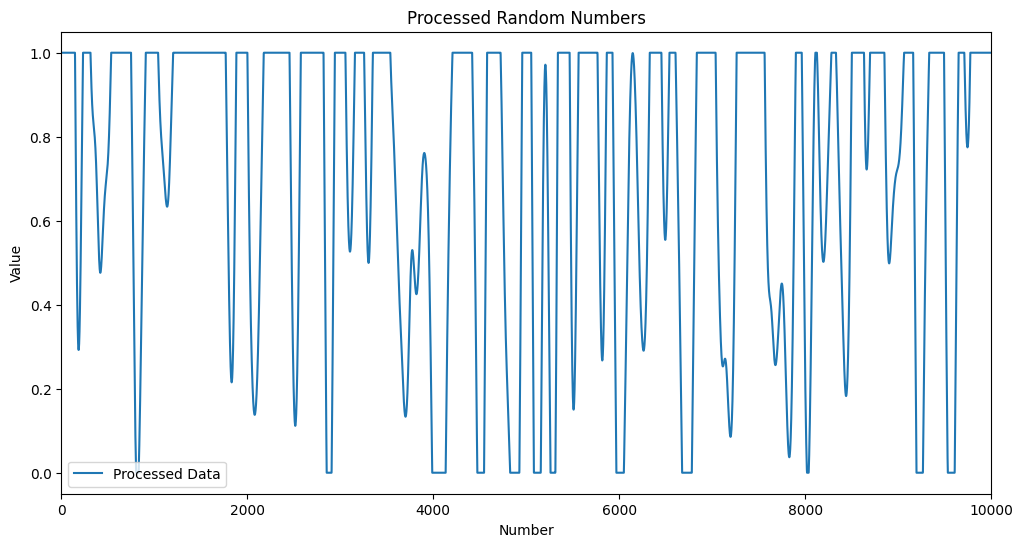

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, lfilter_zi
import pandas as pd

# 乱数生成
np.random.seed(0)  # 再現性のため乱数シードを固定
ran_num = 10000
ran = np.random.rand(ran_num)  # 0~1のfloat型で乱数生成

# ローパスフィルタ
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a) * data[0]  # 初期条件をデータに合わせて設定
    y, _ = lfilter(b, a, data, zi=zi)  # 初期条件を考慮したフィルタリング
    return y

# サンプリング周波数とカットオフ周波数
fs = 1000  # サンプリング周波数（適宜変更）
cutoff = 5  # カットオフ周波数（適宜変更）

# フィルタリング
filtered_ran = butter_lowpass_filter(ran, cutoff, fs)

# 標準化
min_val = np.min(filtered_ran)
max_val = np.max(filtered_ran)
normalized_filtered_ran = (filtered_ran - min_val) / (max_val - min_val)

# -1～3に引き延ばし、1より上を1、0より下を0にする
processed_data = normalized_filtered_ran * 4 - 1  # -1～3に引き延ばし

processed_data[processed_data > 1] = 1  # 1より上を1に
processed_data[processed_data < 0] = 0  # 0より下を0に

# CSVファイルとして保存
df = pd.DataFrame(processed_data, columns=['processed_data'])
df.to_csv('A_EyeOpenness_ran.csv', index=False)

# 結果の表示
plt.figure(figsize=(12, 6))
plt.plot(processed_data, label='Processed Data')
plt.xlim(0, 10000)
plt.xlabel("Number")
plt.ylabel("Value")
plt.title("Processed Random Numbers")
plt.legend()
plt.show()


**口の開き具合動作テスト**

In [ ]:
import pandas as pd

# CSVファイルのパス
csv_file_path = "TestDataLog_JawOpen.csv"
output_csv_file_path = "TestDataLog_JawOpen_WithValidation.csv"

# Jaw Openのレベル計算関数（C#スクリプトのアルゴリズムに基づく）
def calculate_jaw_open_level(jaw_open):
    if jaw_open < 0.2:
        return 1  # 閉じている
    elif jaw_open < 0.5:
        return 2  # 少し開いている
    elif jaw_open < 0.8:
        return 3  # 開いている
    else:
        return 4  # 大きく開いている

# CSVファイルを読み込み
try:
    df = pd.read_csv(csv_file_path)

    # レベルの計算と答え合わせ
    df['Calculated_Level'] = df['A_Input'].apply(calculate_jaw_open_level)  # 計算したレベル
    df['Validation'] = df['Calculated_Level'] == df['B_Level']             # 照合結果（True/False）

    # 整合率を計算
    total_rows = len(df)
    correct_rows = df['Validation'].sum()  # True の行数
    accuracy_percentage = (correct_rows / total_rows) * 100

    # 間違えているフレームを抽出
    incorrect_frames = df.loc[~df['Validation'], 'Frame']  # ValidationがFalseのFrame

    # 新しいCSVファイルとして保存
    df.to_csv(output_csv_file_path, index=False)

    # 結果を表示
    print(f"整合率: {accuracy_percentage:.2f}%")
    if not incorrect_frames.empty:
        print("間違えているフレーム番号:")
        print(incorrect_frames.to_list())
    else:
        print("すべてのデータが正しいです。")

except FileNotFoundError:
    print(f"CSVファイルが見つかりません: {csv_file_path}")
except Exception as e:
    print(f"エラーが発生しました: {e}")


整合率: 100.00%
すべてのデータが正しいです。


コントローラの高さの動作テスト

In [ ]:
import pandas as pd

# CSVファイルのパス
input_csv_path = "TestDataLog_ControllerHeight.csv"  # テストの入力データ
output_csv_path = "TestDataLog_ControllerHeight_WithValidation.csv"  # 結果の出力先

# 高さレベルの計算関数（C#のCalculateHeightLevelに基づく）
def calculate_height_level(initial_height, current_height):
    difference = initial_height - current_height

    # レベルの計算
    if difference < -0.2:
        return 0  # 高い位置
    elif difference < -0.1:
        return 1  # 少し高い位置
    elif difference < 0.1:
        return 2  # 基準付近
    elif difference < 0.2:
        return 3  # 少し低い位置
    else:
        return 4  # 非常に低い位置

# CSVデータを読み込み
try:
    # CSVファイルの読み込み
    df = pd.read_csv(input_csv_path)

    # 初期の高さを最初のフレーム（1行目）の高さとして設定
    initial_height = df.loc[df.index[0], "A_Level"]

    # 高さレベルを計算して新しい列に保存
    df["Calculated_Level"] = df["A_Level"].apply(lambda x: calculate_height_level(initial_height, x))

    # 整合性確認列の追加
    if "B_Level" in df.columns:  # "B_Level" 列が存在する場合のみ整合性を確認
        df["Validation"] = df["Calculated_Level"] == df["B_Level"]  # 一致ならTrue、不一致ならFalse

        # 整合率を計算
        validation_rate = df["Validation"].mean() * 100  # Trueの割合をパーセンテージで計算
        print(f"整合率: {validation_rate:.2f}%")

    # 結果を新しいCSVファイルに保存
    df.to_csv(output_csv_path, index=False)
    print(f"結果を出力しました: {output_csv_path}")
    print(df.head())  # 最初の数行を表示

except FileNotFoundError:
    print(f"CSVファイルが見つかりません: {input_csv_path}")
except Exception as e:
    print(f"エラーが発生しました: {e}")


整合率: 100.00%
結果を出力しました: TestDataLog_ControllerHeight_WithValidation.csv
   Frame      Time   A_Level  B_Level  Calculated_Level  Validation
0      2  0.000000  2.000000        2                 2        True
1      3  0.020000  2.155624        1                 1        True
2      4  0.353333  2.155624        1                 1        True
3      5  0.491764  2.155624        1                 1        True
4      6  0.514231  2.155626        1                 1        True


瞼の開き具合の動作テスト

In [1]:
import pandas as pd

# CSVファイルのパス
input_csv_path = "TestDataLog_EyeOpenness.csv"  # Unityから出力されたCSVファイル
output_csv_path = "TestDataLog_EyeOpenness_WithValidation.csv"  # 検証結果を保存するCSVファイル

# 瞬目検出の条件
BLINK_AMPLITUDE_MIN = 0.2  # 瞬目の振幅最小値
BLINK_AMPLITUDE_MAX = 0.8  # 瞬目の振幅最大値
BLINK_DURATION_THRESHOLD = 300  # 瞬目の最大持続時間 (ms)
CLOSURE_THRESHOLD = 1.0  # 瞬目が終了とみなす開き具合

# レベル計算関数
def calculate_level_from_frequency(frequency):
    if frequency <= 5:
        return 1
    elif frequency <= 10:
        return 2
    elif frequency <= 15:
        return 3
    elif frequency <= 20:
        return 4
    else:
        return 0

# 瞬目検出と頻度計算
def process_eye_openness(df):
    non_voluntary_blink_timestamps = []
    blink_start_time = None
    blink_start = None
    blink_peak = None
    is_blinking = False
    is_closing = False
    calculated_levels = []
    frequencies = []

    for i in range(1, len(df)):
        current_time = df.loc[i, "Time"]
        previous_level = df.loc[i - 1, "A_Level"]
        current_level = df.loc[i, "A_Level"]
        time_difference = (current_time - df.loc[i - 1, "Time"]) * 1000  # 時間差をmsに変換

        # 瞬目検出ロジック
        if not is_blinking and current_level < previous_level:
            is_blinking = True
            is_closing = True
            blink_start_time = current_time
            blink_start = current_level
            blink_peak = current_level
        elif is_blinking:
            if is_closing:
                if current_level < blink_peak:
                    blink_peak = current_level
                elif current_level > blink_peak:
                    is_closing = False
            else:
                if current_level >= CLOSURE_THRESHOLD or current_level < previous_level:
                    blink_duration = (current_time - blink_start_time) * 1000
                    blink_amplitude = blink_start - blink_peak
                    if (
                        BLINK_AMPLITUDE_MIN <= blink_amplitude <= BLINK_AMPLITUDE_MAX
                        and blink_duration <= BLINK_DURATION_THRESHOLD
                    ):
                        non_voluntary_blink_timestamps.append(current_time)
                    is_blinking = False

        # 古いタイムスタンプを削除
        non_voluntary_blink_timestamps = [
            t for t in non_voluntary_blink_timestamps if current_time - t <= 60
        ]

        # 瞬目頻度を計算
        if current_time <= 60:
            frequency = len(non_voluntary_blink_timestamps) * (60 / current_time)
        else:
            frequency = len(non_voluntary_blink_timestamps)

        # レベルを計算
        awareness_level = calculate_level_from_frequency(frequency)

        # データを記録
        calculated_levels.append(awareness_level)
        frequencies.append(frequency)

    # 結果をDataFrameに追加
    df["Calculated_Frequency"] = [0] + frequencies  # 初期行は0
    df["Calculated_B_Level"] = [0] + calculated_levels  # 初期行は0
    return df

# メイン処理
try:
    # データを読み込み（0行目を無視）
    df = pd.read_csv(input_csv_path, skiprows=1)

    # 必須列が存在するか確認
    if not all(col in df.columns for col in ["Frame", "Time", "A_Level", "B_Level"]):
        raise ValueError("CSVに必要な列（Frame, Time, A_Level, B_Level）が見つかりません")

    # 瞬目頻度とレベルを計算
    df = process_eye_openness(df)

    # 整合性の確認
    df["Is_Valid"] = df["B_Level"] == df["Calculated_B_Level"]

    # 整合率を計算
    total_rows = len(df)
    valid_rows = df["Is_Valid"].sum()
    accuracy = (valid_rows / total_rows) * 100

    # 結果を保存
    df.to_csv(output_csv_path, index=False)

    print(f"整合率: {accuracy:.2f}%")
    print(f"結果を保存しました: {output_csv_path}")
    print(df.head())  # 最初の数行を表示

except FileNotFoundError:
    print(f"CSVファイルが見つかりません: {input_csv_path}")
except ValueError as ve:
    print(f"CSVフォーマットエラー: {ve}")
except Exception as e:
    print(f"エラーが発生しました: {e}")


CSVファイルが見つかりません: TestDataLog_EyeOpenness.csv


In [ ]:
import pandas as pd

# CSVファイルのパス
input_csv_path = "TestDataLog_EyeOpenness.csv"  # Unityから出力されたCSVファイル
output_csv_path = "TestDataLog_EyeOpenness_WithValidation.csv"  # 検証結果を保存するCSVファイル
error_context_csv_path = "ErrorContext_EyeOpenness.csv"  # エラー箇所の前後を保存するCSV

# 瞬目の条件とレベル計算関数
BLINK_AMPLITUDE_MIN = 0.2
BLINK_AMPLITUDE_MAX = 0.8
BLINK_DURATION_THRESHOLD = 300
CLOSURE_THRESHOLD = 1.0

def calculate_level_from_frequency(frequency):
    if frequency <= 5:
        return 1
    elif frequency <= 10:
        return 2
    elif frequency <= 15:
        return 3
    elif frequency <= 20:
        return 4
    else:
        return 0

def process_eye_openness(df):
    non_voluntary_blink_timestamps = []
    blink_start_time = None
    blink_start = None
    blink_peak = None
    is_blinking = False
    is_closing = False
    calculated_levels = []
    frequencies = []

    for i in range(1, len(df)):
        current_time = df.loc[i, "Time"]
        previous_level = df.loc[i - 1, "A_Level"]
        current_level = df.loc[i, "A_Level"]
        time_difference = (current_time - df.loc[i - 1, "Time"]) * 1000  # ms

        if not is_blinking and current_level < previous_level:
            is_blinking = True
            is_closing = True
            blink_start_time = current_time
            blink_start = current_level
            blink_peak = current_level
        elif is_blinking:
            if is_closing:
                if current_level < blink_peak:
                    blink_peak = current_level
                elif current_level > blink_peak:
                    is_closing = False
            else:
                if current_level >= CLOSURE_THRESHOLD or current_level < previous_level:
                    blink_duration = (current_time - blink_start_time) * 1000
                    blink_amplitude = blink_start - blink_peak
                    if (
                        BLINK_AMPLITUDE_MIN <= blink_amplitude <= BLINK_AMPLITUDE_MAX
                        and blink_duration <= BLINK_DURATION_THRESHOLD
                    ):
                        non_voluntary_blink_timestamps.append(current_time)
                    is_blinking = False

        non_voluntary_blink_timestamps = [
            t for t in non_voluntary_blink_timestamps if current_time - t <= 60
        ]

        if current_time <= 60:
            frequency = len(non_voluntary_blink_timestamps) * (60 / current_time)
        else:
            frequency = len(non_voluntary_blink_timestamps)

        awareness_level = calculate_level_from_frequency(frequency)
        calculated_levels.append(awareness_level)
        frequencies.append(frequency)

    df["Calculated_Frequency"] = [0] + frequencies
    df["Calculated_B_Level"] = [0] + calculated_levels
    return df

try:
    df = pd.read_csv(input_csv_path)

    if not all(col in df.columns for col in ["Frame", "Time", "A_Level", "B_Level"]):
        raise ValueError("CSVに必要な列がありません")

    df = process_eye_openness(df)
    df["Is_Valid"] = df["B_Level"] == df["Calculated_B_Level"]

    total_rows = len(df)
    valid_rows = df["Is_Valid"].sum()
    accuracy = (valid_rows / total_rows) * 100

    df.to_csv(output_csv_path, index=False)

    # 整合性が取れていないフレームを特定し、その前後10行を抽出
    error_indices = df.index[~df["Is_Valid"]]
    error_context = pd.concat(
        [df[max(0, i - 10): min(len(df), i + 10)] for i in error_indices]
    ).drop_duplicates()

    # エラー箇所を保存
    error_context.to_csv(error_context_csv_path, index=False)
    print(f"整合率: {accuracy:.2f}%")
    print(f"検証結果を保存しました: {output_csv_path}")
    print(f"エラー箇所の前後10行を保存しました: {error_context_csv_path}")

except FileNotFoundError:
    print(f"CSVファイルが見つかりません: {input_csv_path}")
except ValueError as ve:
    print(f"CSVフォーマットエラー: {ve}")
except Exception as e:
    print(f"エラーが発生しました: {e}")


整合率: 99.99%
検証結果を保存しました: TestDataLog_EyeOpenness_WithValidation.csv
エラー箇所の前後10行を保存しました: ErrorContext_EyeOpenness.csv


In [ ]:
!python --version

Python 3.11.11


   Frame      Time   A_Level  B_Level  Calculated_Level  Validation
0      2  0.000000  2.000000        2                 2        True
1      3  0.020000  2.155624        1                 1        True
2      4  0.353333  2.155624        1                 1        True
3      5  0.491764  2.155624        1                 1        True
4      6  0.514231  2.155626        1                 1        True


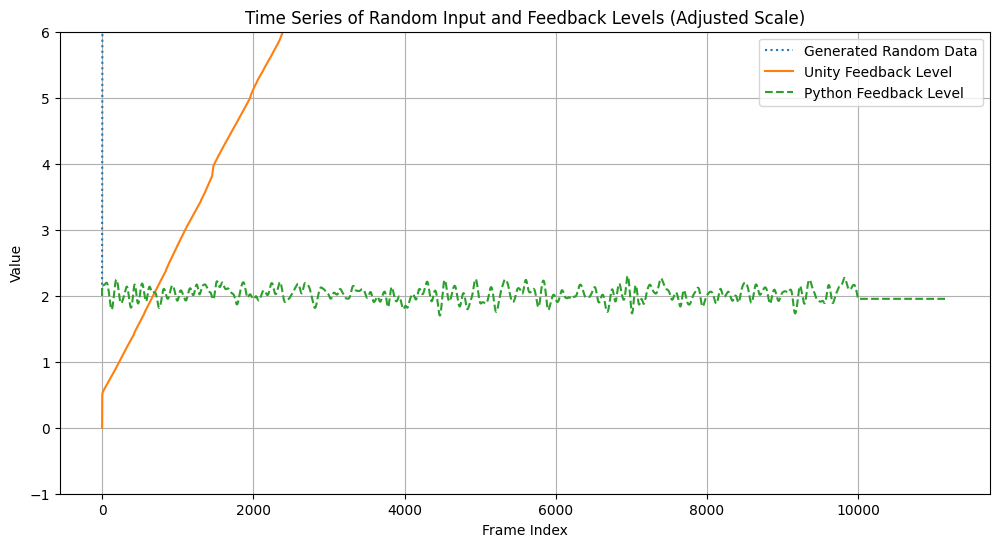

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSVファイルを読み込む
file_path = "TestDataLog_ControllerHeight_WithValidation.csv"
df = pd.read_csv(file_path)

# カラム名の確認（適宜修正）
print(df.head())

# グラフを描画
plt.figure(figsize=(12, 6))

# 生成された乱数データをプロット（仮に 'RandomInput' という列名）
plt.plot(df.index, df.iloc[:, 0], label="Generated Random Data", linestyle="dotted")

# Unityでのフィードバックレベル（仮に 'UnityFeedbackLevel' という列名）
plt.plot(df.index, df.iloc[:, 1], label="Unity Feedback Level", linestyle="solid")

# Pythonでのフィードバックレベル（仮に 'PythonFeedbackLevel' という列名）
plt.plot(df.index, df.iloc[:, 2], label="Python Feedback Level", linestyle="dashed")

# 縦軸の範囲を調整（適宜範囲を変更）
plt.ylim(-1, 6)  # フィードバックレベルが0～5の範囲と仮定

# グラフのラベル・タイトル
plt.xlabel("Frame Index")
plt.ylabel("Value")
plt.title("Time Series of Random Input and Feedback Levels (Adjusted Scale)")
plt.legend()
plt.grid(True)

# グラフを表示
plt.show()
